<a id='top'></a>

# CSCI3022 S21
# Homework 6: Testing
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 15**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Problem 1 - Mins or Maxs?

It's a common data science and numeric problem to need to find **best** estimators, which often represent maximums of "value" functions or minimums of "loss" functions.  In this problem we explore the way that minimums and maximums interact with one another.

Consider rolling some fair, independent, 10-sided dice, with faces [1,2,3,...,10].

#### Part a) Maximums

Suppose we roll 2 such 10-sided die.  Denote $M:=$ the maximum of the two rolls (we will refer to this as the roller having "advantage" when trying to achieve a high roll in a die-rolling game).

i) Use markdown to express the exact pdf of $M$.

ii) Print the expected value of $M$.

iii) Print the variance of $M$.


i) $P(M = x) = \begin{cases}
                    1/100, X = 1\\
                    3/100, X = 2\\
                    5/100, X = 3\\
                    7/100, X = 4\\
                    9/100, X = 5\\
                    11/100, X = 6\\
                    13/100, X = 7\\
                    15/100, X = 8\\
                    17/100, X = 9\\
                    19/100, X = 10\\
                \end{cases}$
    
    

In [21]:
expVal = 0
expVal2 = 0
for x in range(1,11):
    if(x < 2):
        expVal += np.sum(x * x/100)
        expVal2 += np.sum(x**2 *x/100)
    else:
        expVal += np.sum(x * (x+(x-1))/100)
        expVal2 += np.sum(x**2 *(x+(x-1))/100)
print("ii) Expected value of M:",expVal)    
print("iii) Variance of M:", expVal2-expVal**2)

ii) Expected value of M: 7.15
iii) Variance of M: 5.527500000000003



#### Part b) Min-Max

In the rest of this problem, we'll explore tacking **both** a minimum and a maximum.  In particular, we define the experiment of *min-max*, in which we compute the minimum of two maximum rolls.  Formally: we roll 2 dice and record their maximum $M_1$, then roll 2 more dice and record their maximum $M_2$.  Finally, we denote $mM:=$ the mimimun of the two $M_1$ and $M_2$ rolls.  We may refer to this as "disadvantage-of-advantage."

Set up a function to simulate $n=10^4$ draws from the $mM$ random variable.  Then, *simulate* and/or *bootstrap* with your function to answer the following:

i) What is the pdf of $mM$?  Plot it as a histogram.

ii) What is the expected value of $mM$?

iii) What is the probability that an $mM$ random variable returns a value greater then 5? Construct both a point estimate and a 90\% confidence interval for this value.

For the bootstrapped CI in iii, it is recommended you group your $10^4$ trials into 100 groups of 100 trials in order to construct a distribution of sample probabilities.

Expected Value of mM: 7177.969999999221
Probability of value greater than 5: 0.58169
Confidence Interval: (5.780254853172599, 5.853545146827402)


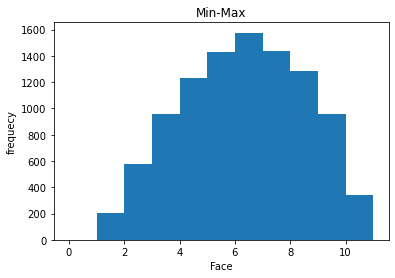

In [23]:
totalMaxArr = []
minRollArr = []
for n in range(0,20000):
    rollInitial=np.random.randint(1, 11)
    rollFinal=np.random.randint(1, 11)
    if rollInitial >= rollFinal:
        totalMaxArr.append(rollInitial)
    elif rollFinal >= rollInitial:
        totalMaxArr.append(rollFinal)
        
for i in range(0,20000-1,2):
    if totalMaxArr[i] <= totalMaxArr[i+1]:
        minRollArr.append(totalMaxArr[i])
    elif totalMaxArr[i+1] <= totalMaxArr[i]:
        minRollArr.append(totalMaxArr[i+1])     

plt.hist(minRollArr, bins = range(0,12))
plt.xlabel("Face")
plt.ylabel("frequecy")
plt.title("Min-Max")

expVal = 0
for i in range(len(minRollArr)):
    if minRollArr[i] == 1:
        expVal += minRollArr[i] * 1/100
    elif minRollArr[i] == 2:
        expVal += minRollArr[i] * 3/100
    elif minRollArr[i] == 3:
        expVal += minRollArr[i] * 5/100
    elif minRollArr[i] == 4:
        expVal += minRollArr[i] * 7/100
    elif minRollArr[i] == 5:
        expVal += minRollArr[i] * 9/100
    elif minRollArr[i] == 6:
        expVal += minRollArr[i] * 11/100
    elif minRollArr[i] == 7:
        expVal += minRollArr[i] * 13/100
    elif minRollArr[i] == 8:
        expVal += minRollArr[i] * 15/100
    elif minRollArr[i] == 9:
        expVal += minRollArr[i] * 17/100
    elif minRollArr[i] == 10:
        expVal += minRollArr[i] * 19/100
print("Expected Value of mM:",expVal)
print("Probability of value greater than 5:",np.mean(minRollArr)/10)
print("Confidence Interval:",stats.t.interval(alpha=0.90, df=len(minRollArr), loc=np.mean(minRollArr), scale=stats.sem(minRollArr)))



#### Part c) Max-min

Now, define the experiment of *max-min*, in which we compute the maximum of two minumum rolls.  Formally: we roll 2 dice and record their minimum $m_1$, then roll 2 more dice and record their minimum $m_2$.  Finally, we denote $Mm:=$ the maximum of the two $m_1$ and $m_2$ rolls.  We may refer to this as "advantage-of-disadvantage."

Set up a function to simulate $n$ draws from the $Mm$ random variable.  Then, *simulate* and/or *bootstrap* with your function to answer the following:

i) What is the pdf of $Mm$?  Plot it as a histogram.

ii) What is the expected value of $Mm$?

iii) What is the probability that an $Mm$ random variable returns a value greater then 5?   Construct both a point estimate and a 90\% confidence interval for this value.




Expected Value of Mm: 5915.859999999491
Probability of value greater than 5: 0.5219400000000001
Confidence Interval: (5.182810693633086, 5.2559893063669145)


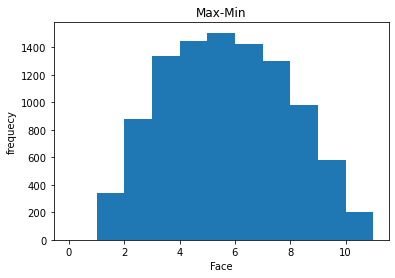

In [24]:
totalMaxArr = []
minRollArr = []
for n in range(0,20000):
    rollInitial=np.random.randint(1,11)
    rollFinal=np.random.randint(1,11)
    if rollInitial <= rollFinal:
        totalMaxArr.append(rollInitial)
    elif rollFinal <= rollInitial:
        totalMaxArr.append(rollFinal)
        
for i in range(0,20000-1,2):
    if totalMaxArr[i] >= totalMaxArr[i+1]:
        minRollArr.append(totalMaxArr[i])
    elif totalMaxArr[i+1] >= totalMaxArr[i]:
        minRollArr.append(totalMaxArr[i+1])        
        
plt.hist(minRollArr, bins = range(0,12))
plt.xlabel("Face")
plt.ylabel("frequecy")
plt.title("Max-Min")


expVal = 0
for i in range(len(minRollArr)):
    if minRollArr[i] == 1:
        expVal += minRollArr[i] * 1/100
    elif minRollArr[i] == 2:
        expVal += minRollArr[i] * 3/100
    elif minRollArr[i] == 3:
        expVal += minRollArr[i] * 5/100
    elif minRollArr[i] == 4:
        expVal += minRollArr[i] * 7/100
    elif minRollArr[i] == 5:
        expVal += minRollArr[i] * 9/100
    elif minRollArr[i] == 6:
        expVal += minRollArr[i] * 11/100
    elif minRollArr[i] == 7:
        expVal += minRollArr[i] * 13/100
    elif minRollArr[i] == 8:
        expVal += minRollArr[i] * 15/100
    elif minRollArr[i] == 9:
        expVal += minRollArr[i] * 17/100
    elif minRollArr[i] == 10:
        expVal += minRollArr[i] * 19/100
print("Expected Value of Mm:",expVal)      
print("Probability of value greater than 5:",np.mean(minRollArr)/10)
print("Confidence Interval:",stats.t.interval(alpha=0.90, df=len(minRollArr), loc=np.mean(minRollArr), scale=stats.sem(minRollArr)))



#### Part d) Discussion

Taking a look at your work in parts c or d, use full English sentences to answer the following:

i) In general, which returns a higher value: the maximum of minimums or the minimum of maximums?

ii) Is there ever a case to prefer a min-of-max rather than a max-of-mins?  Suppose the goal is to return "a 2 or higher", which do we prefer?  Is this a different best choice from the goal of "need to return exactly a 20?"

iii) What happens if the number of rolls in the selection increases?  For example, if I roll 100 dice in total, and take as my random variable the minimum of 10 sets of 10 maximums, how should this differ from the distribution in part b)?  You may simulate to verify your result, but should try to explain in plain English either way?

1) In general, the minimum of maximums returned the higher values.

2) Yes, there are cases to prefer a min-of-max rather than a max-of-mins. If the goal is to return "a 2 or higher", it would be better to go with min-of-max -- which is also the case for "need to return exactly a 20". 

3) If the number of rolls in the selection increases, the distribution would be higher -- as there are more maximums in each set. When choosing the minimums out of the 10 maximum sets, the values would be toward the higher end of the rolls.
    
    

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [10 points] Problem 2 - A (very) small sample hypothesis test

We're counting birds outside our work-from-home offices, and recording $X$, the number that pass between 2p-3p.  Let $X \sim \mathcal{P}(\lambda)$. Suppose that we want to test the null hypothesis that $\lambda = 15$, and the alternative hypothesis is that $\lambda > 15$. Since we're just starting today, our sample size for this test is equal to 1.
	
#### Part a)
 
Naturally for a hypothesis test we might come up with a rejection region. Here, we will reject the null hypothesis if $X$ is greater than some number $c$ that represents "too many birds" for a process of $\lambda = 15$. What value should we choose for $c$ such that the probability of a type I error is equal to $0.05$?

(NB: for a discrete R.V., we more precisely ensure that P(Type I error) *is not more than* $0.05$)


***
$H_0: \lambda = 15, H_1: \lambda > 15 \\ P_{H_0}[x > c] \le 0.05 \\ P_{H_0}[x \le c] \ge 0.95 \\ \sum_{x=0}^{c} e^{-15}*\frac{15^x}{x!} \ge 0.95 \\$
$c = 21: P_{H_0}[x \le 21] = 0.9468, c = 22: P_{H_0}[x \le 22] = 0.9672 > 0.95 \\ $
The value that should we choose for c such that the probability of a type I error is equal to  0.05 is 22.
    
    


#### Part b)

If in reality, $\lambda$ is *actually* equal to 20, what is the probability of making a type 2 error using the cut-off point from (a)?
    
    

***
$H_0: \lambda = 15, H_1: \lambda > 15 \\ = P_{H_0}[x \le c] \\ = P_{H_0}[x \le 22] \\ = \sum_{x=0}^{22} e^{-20}*\frac{20^x}{x!} \\ = 0.72061$

    

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [10 points] Problem 3 - The power!


Let $Y$ be the number of heads in 100 tosses of a possibly biased coin, with probability of heads on any toss $p$. Similar to the Belgian Euro example, we hope to *test* whether the coin is biased **toward heads**.

#### Part a)

State the null and alternative hypotheses.


***
The null and alterative hypotheses are as follows: $\\ H_0: p = 0.50 \\ H_1: p > 0.50$


#### Part b)
Suppose we define the rejection region to be $Y > 58$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)


In [3]:
import scipy
prob = scipy.stats.binom.cdf(57, 100, 0.5)
finalProb = 1 - prob
print(finalProb)

0.06660530960360678



#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).


In [9]:
import random
def experiment(): 
    top_face = random.randint(0, 1)

    if top_face == 1: 
        return 1 
    return 0

headCounter = 0 

for _ in range(1000):
    headCounter += experiment()
print(f"The probability of getting head is {headCounter / 1000000 * 100}%")

The probability of getting head is 0.04970000000000001%



#### Part d)
Consider that the *reality* of a biased coin could take on any number of possible different values of actual bias $p$.  Construct a grid/list of possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the power of the test from part $a$.  Return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

51 Power: 0.593
52 Power: 0.742
53 Power: 0.908
54 Power: 0.370
55 Power: 0.784
56 Power: 0.742
57 Power: 0.855
58 Power: 0.742
59 Power: 0.784
60 Power: 0.958
61 Power: 0.999
62 Power: 0.958
63 Power: 0.944
64 Power: 0.994
65 Power: 0.884
66 Power: 0.998
67 Power: 1.000
68 Power: 0.996
69 Power: 0.968
70 Power: 0.976
71 Power: 0.988
72 Power: 1.000
73 Power: 0.999
74 Power: 0.988
75 Power: 1.000
76 Power: 1.000
77 Power: 1.000
78 Power: 1.000
79 Power: 1.000
80 Power: 1.000
81 Power: 1.000
82 Power: 1.000
83 Power: 1.000
84 Power: 1.000
85 Power: 1.000
86 Power: 1.000
87 Power: 1.000
88 Power: 1.000
89 Power: 1.000
90 Power: 1.000
91 Power: 1.000
92 Power: 1.000
93 Power: 1.000
94 Power: 1.000
95 Power: 1.000
96 Power: 1.000
97 Power: 1.000
98 Power: 1.000
99 Power: 1.000
100 Power: 1.000


Text(0, 0.5, 'power')

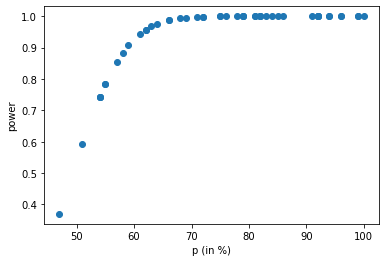

In [18]:
hypOneVals = []
for i in range(51,101):
    hypOneVals.append(i)
totalSets = []
for j in range(len(hypOneVals)):
    total = 0
    for i in range(0,100):
        flip = np.random.randint(0,100)
        if flip < hypOneVals[j]:
            total += 1
    totalSets.append(total)

powerArr = []
def statPower(lam):
    total = 0
    for i in range(0,lam+1):
        total += np.exp(1)**(-50) * 50**i/np.math.factorial(i)
    return total
for i in range(0,len(totalSets)):
    print(hypOneVals[i],"Power: %.3f" % statPower(totalSets[i]))
    powerArr.append(statPower(totalSets[i]))
    
plt.scatter(totalSets,powerArr)
plt.xlabel("p (in %)")
plt.ylabel("power")


As $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, the power increases until it plateaus at 1.0.

#### Part e)

(e) Suppose we allowed other rejection regions than $Y>58$.  Use the ideas in part (d) to answer the following: how many flips $m$ of a coin are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a)?

To achieve $\alpha=0.05$, it would take a minimum of about 65 flips -- since the conditions from part A will be satsified as long as flips > 58. To achieve $\beta=0.05$, it should also take around 65 flips to satisfy $\beta \leq 0.05$ -- though the values of $\beta$ vary due to the randomness, 